In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from keras import callbacks, layers

In [6]:
df = pd.read_csv('./weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<Axes: >

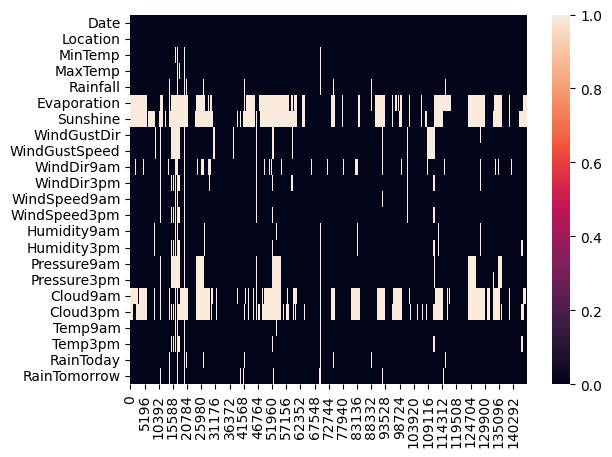

In [9]:
sns.heatmap(df.isna().transpose())

In [10]:
df = df.drop('Date', axis=1)
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].replace({'No': 0, 'Yes': 1})
df = df.dropna(subset=['RainToday'], axis=0)
df = df.dropna(subset=['RainTomorrow'], axis=0)# удаляем если в строке пропущен признак наличия дождя
df.shape

/var/folders/6r/3zbb7bfn2xl2h3h0gkgglcjr0000gn/T/ipykernel_16652/1876971937.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1})
/var/folders/6r/3zbb7bfn2xl2h3h0gkgglcjr0000gn/T/ipykernel_16652/1876971937.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainTomorrow'] = df['RainTomorrow'].replace({'No': 0, 'Yes': 1})


(140787, 22)

<Axes: >

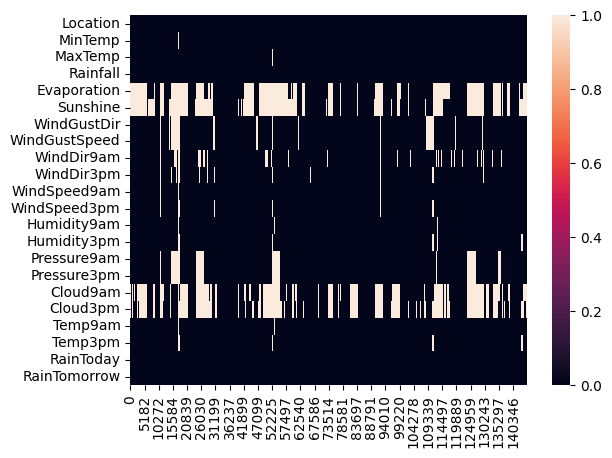

In [11]:
sns.heatmap(df.isna().transpose())

In [12]:
cols = df.select_dtypes(include='object').columns
for col in cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)  # Заменяем NaN на моду

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  object 
 1   MinTemp        140319 non-null  float64
 2   MaxTemp        140480 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81093 non-null   float64
 5   Sunshine       73982 non-null   float64
 6   WindGustDir    140787 non-null  object 
 7   WindGustSpeed  131682 non-null  float64
 8   WindDir9am     140787 non-null  object 
 9   WindDir3pm     140787 non-null  object 
 10  WindSpeed9am   139732 non-null  float64
 11  WindSpeed3pm   138256 non-null  float64
 12  Humidity9am    139270 non-null  float64
 13  Humidity3pm    137286 non-null  float64
 14  Pressure9am    127044 non-null  float64
 15  Pressure3pm    127018 non-null  float64
 16  Cloud9am       88162 non-null   float64
 17  Cloud3pm       84693 non-null   fl

In [13]:
df.isna().sum()

Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir          0
WindGustSpeed     9105
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [14]:
object_columns = df.select_dtypes(include='object')
object_columns

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Albury,W,W,WNW
1,Albury,WNW,NNW,WSW
2,Albury,WSW,W,WSW
3,Albury,NE,SE,E
4,Albury,W,ENE,NW
...,...,...,...,...
145454,Uluru,E,ESE,E
145455,Uluru,E,SE,ENE
145456,Uluru,NNW,SE,N
145457,Uluru,N,SE,WNW


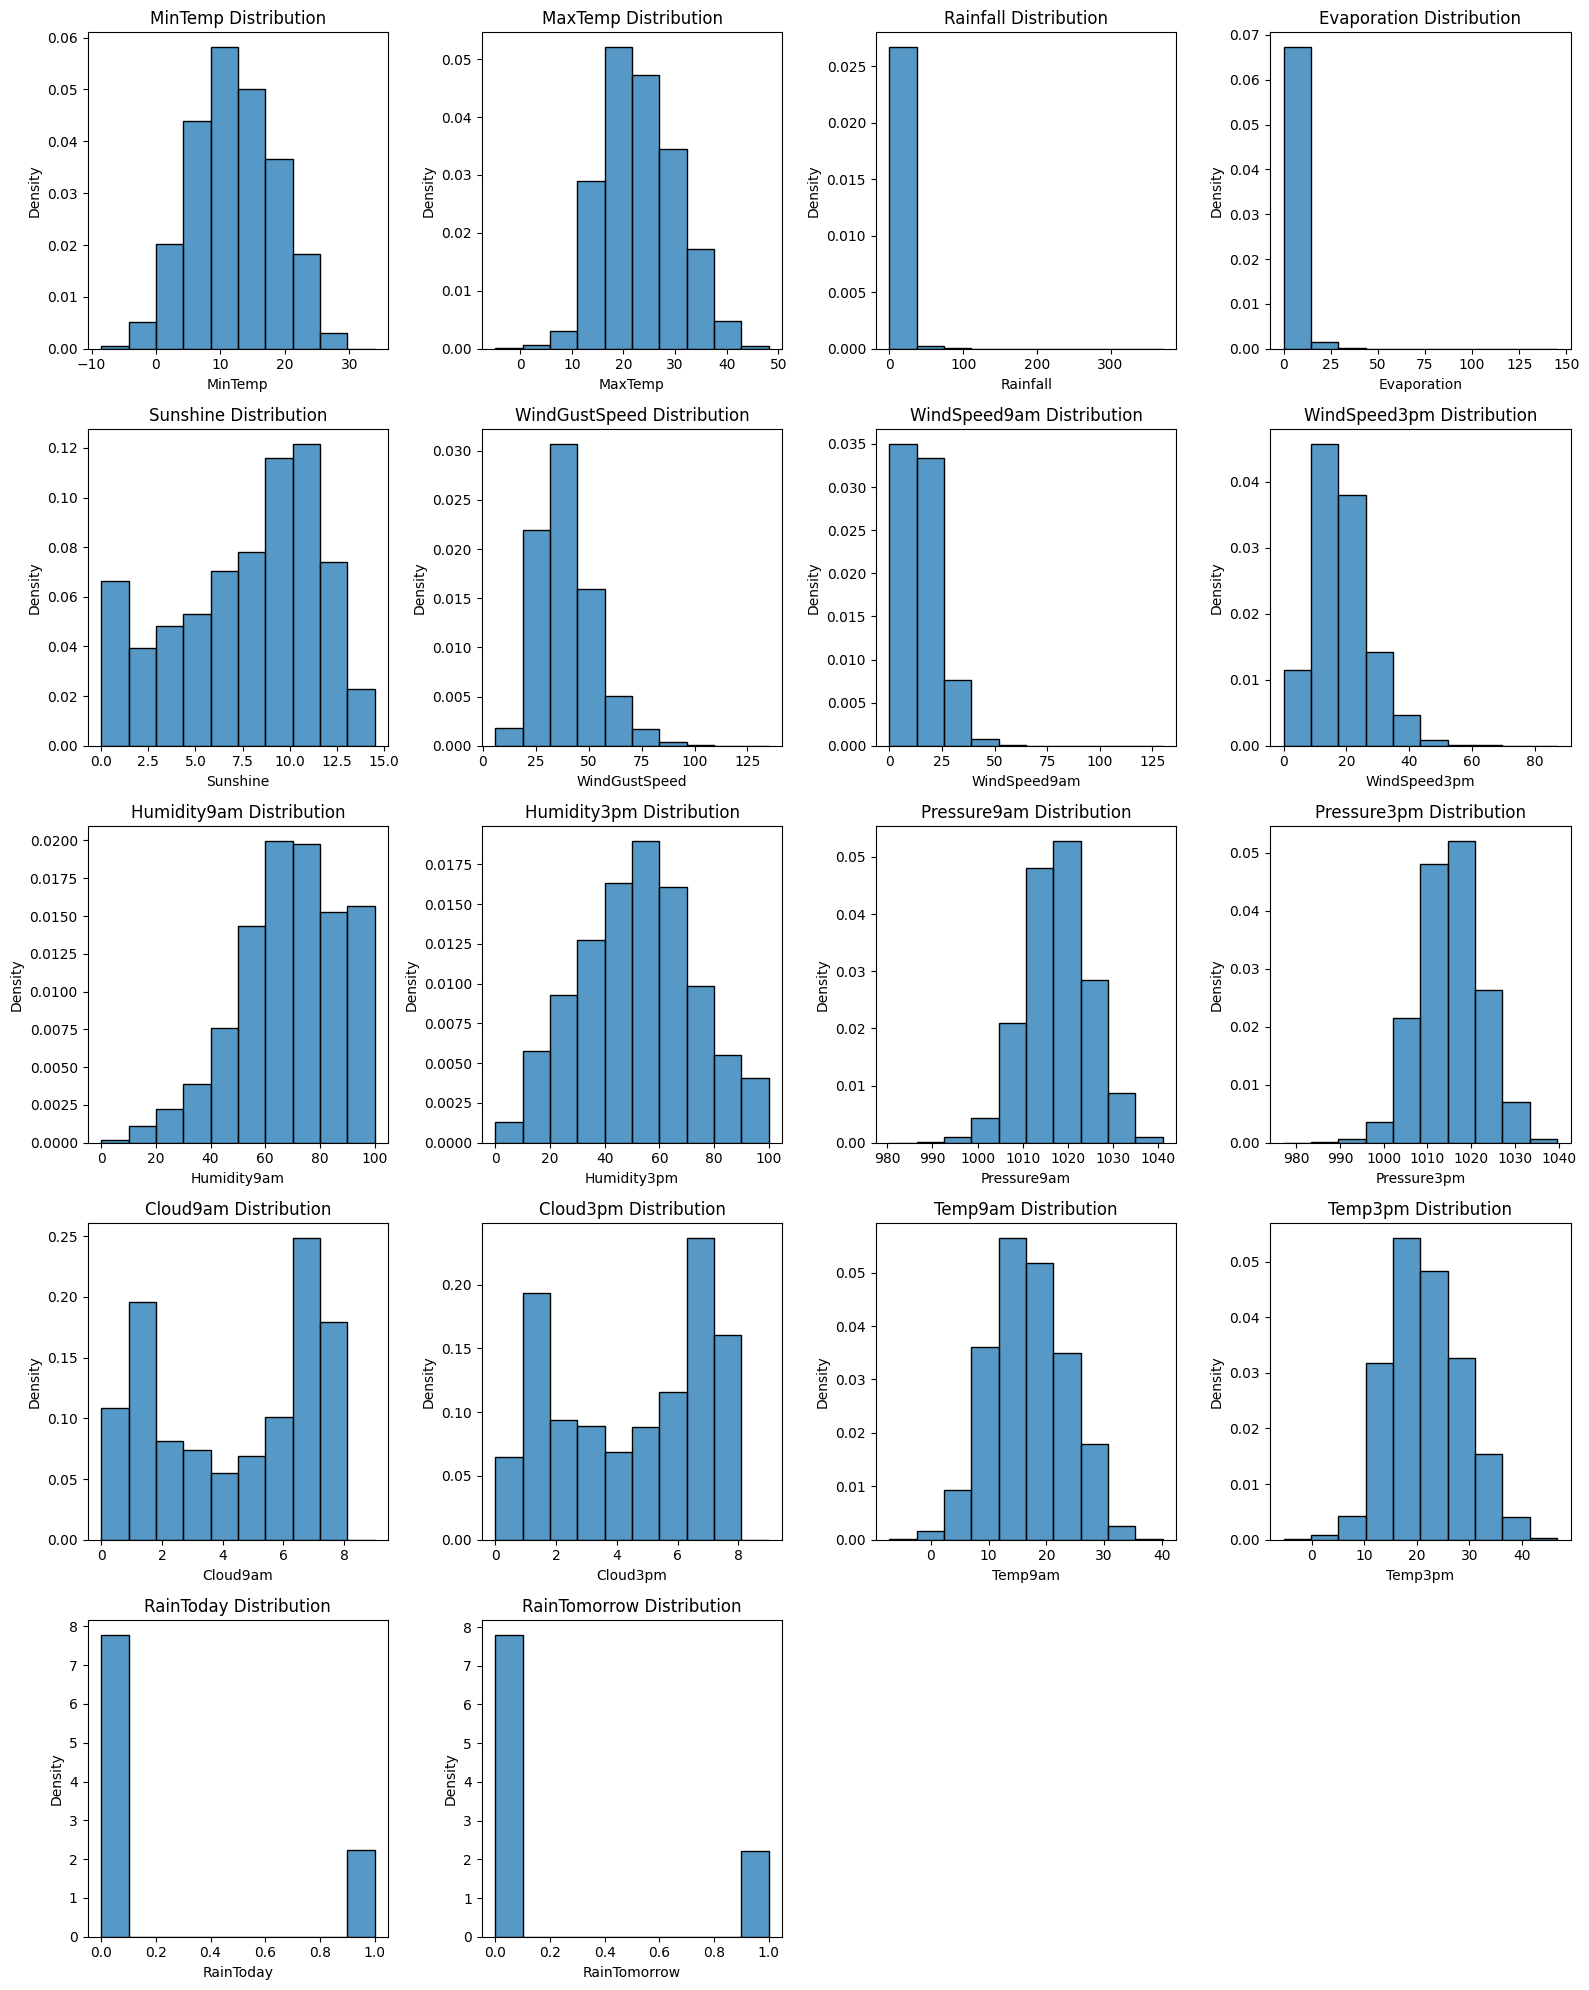

In [15]:
float_columns = df.select_dtypes(include=['float64'])


num_graphs = len(float_columns.columns)
rows = (num_graphs + 3) // 4

plt.figure(figsize=(16, 4 * rows))

for i, column in enumerate(float_columns.columns):
    plt.subplot(rows, 4, i + 1)
    sns.histplot(float_columns[column], stat="density", bins=10)
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()

In [16]:
def impute_missing_values(df):
    float_columns = df.select_dtypes(include=['float64'])

    for column in float_columns.columns:
        if df[column].isnull().any():
            mean = df[column].mean()
            median = df[column].median()
            skewness = df[column].skew()

            if abs(skewness) < 0.15:
                df[column] = df[column].fillna(round(mean, 2))
                print(f'Column "{column}": Replaced missing values with mean ({round(mean, 2)}).')
            # Если есть сильные выбросы или асимметрия, используем медиану
            else:
                df[column] = df[column].fillna(round(median, 2))
                print(f'Column "{column}": Replaced missing values with median ({round(median, 2)}).')

impute_missing_values(df)
df.head()

Column "MinTemp": Replaced missing values with mean (12.18).
Column "MaxTemp": Replaced missing values with median (22.6).
Column "Evaporation": Replaced missing values with median (4.8).
Column "Sunshine": Replaced missing values with median (8.5).
Column "WindGustSpeed": Replaced missing values with median (39.0).
Column "WindSpeed9am": Replaced missing values with median (13.0).
Column "WindSpeed3pm": Replaced missing values with median (19.0).
Column "Humidity9am": Replaced missing values with median (70.0).
Column "Humidity3pm": Replaced missing values with mean (51.45).
Column "Pressure9am": Replaced missing values with mean (1017.65).
Column "Pressure3pm": Replaced missing values with mean (1015.26).
Column "Cloud9am": Replaced missing values with median (5.0).
Column "Cloud3pm": Replaced missing values with median (5.0).
Column "Temp9am": Replaced missing values with mean (16.99).
Column "Temp3pm": Replaced missing values with median (21.1).


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,0.0
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,0.0
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,0.0
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0.0,0.0
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [17]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [19]:
categorial_label = list()
for label in df:
    if (df[label].dtype == object):
        categorial_label.append(label)

encoder_list = {}
for categ in categorial_label:
    encoder = LabelEncoder()
    encoder.fit(df[categ].unique())
    encoder_list[categ] = encoder
    df[categ] = encoder.transform(df[categ])

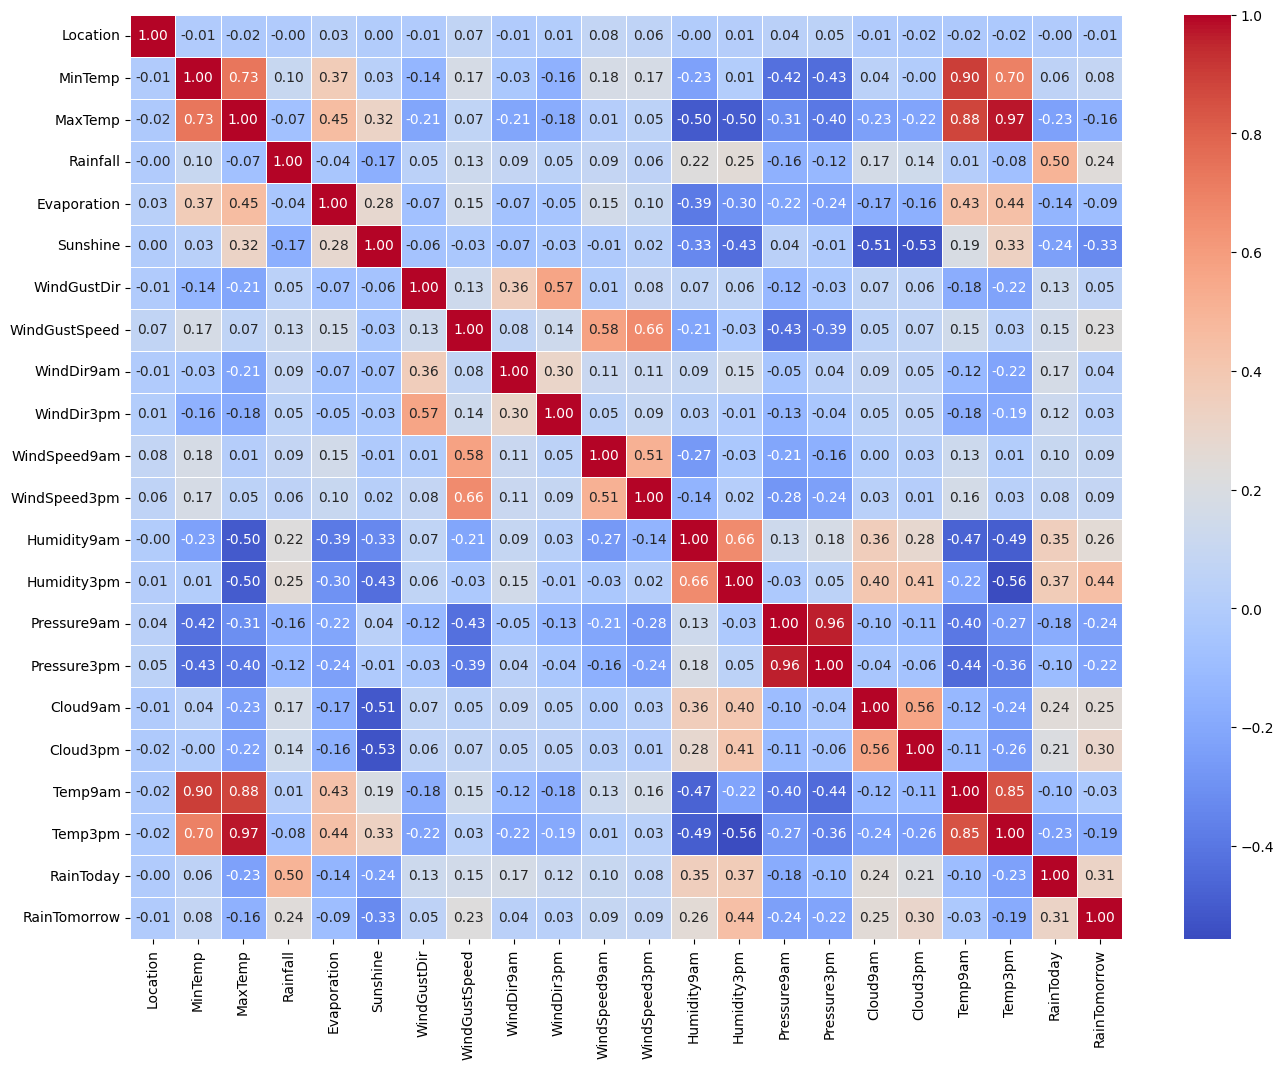

In [22]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [23]:
correlation_matrix = df.corr()
mask = (correlation_matrix.abs() > 0.85) & (correlation_matrix.abs() < 1)

to_drop = [column for column in correlation_matrix.columns if any(mask[column])]

df = df.drop(columns=to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  int64  
 1   Rainfall       140787 non-null  float64
 2   Evaporation    140787 non-null  float64
 3   Sunshine       140787 non-null  float64
 4   WindGustDir    140787 non-null  int64  
 5   WindGustSpeed  140787 non-null  float64
 6   WindDir9am     140787 non-null  int64  
 7   WindDir3pm     140787 non-null  int64  
 8   WindSpeed9am   140787 non-null  float64
 9   WindSpeed3pm   140787 non-null  float64
 10  Humidity9am    140787 non-null  float64
 11  Humidity3pm    140787 non-null  float64
 12  Cloud9am       140787 non-null  float64
 13  Cloud3pm       140787 non-null  float64
 14  RainToday      140787 non-null  float64
 15  RainTomorrow   140787 non-null  float64
dtypes: float64(12), int64(4)
memory usage: 22.3 MB


In [30]:
from sklearn.model_selection import train_test_split

x_ds = df.drop(['RainTomorrow'], axis = 1)
y_ds = df["RainTomorrow"]
x_train, x_test, y_train, y_test = train_test_split(x_ds, y_ds, train_size=0.85,random_state = 45)

In [31]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,  # Минимальное изменение для того, чтобы считать улучшение значимым
    patience=5,      # Количество эпох без улучшения, после которых будет остановка
    restore_best_weights=True,  # Восстановление лучших весов модели
)

model = Sequential()

model.add(layers.Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))


model.add(layers.Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.00009)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=60, callbacks=[early_stopping], validation_split=0.2, shuffle=True)

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')
predictions = model.predict(x_test)

Epoch 1/60


/Users/a1/Desktop/dev/math_modeling/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2992/2992 ━━━━━━━━━━━━━━━━━━━━ 2s 690us/step - accuracy: 0.7996 - loss: 0.4739 - val_accuracy: 0.8363 - val_loss: 0.3787
Epoch 2/60
2992/2992 ━━━━━━━━━━━━━━━━━━━━ 2s 623us/step - accuracy: 0.8397 - loss: 0.3686 - val_accuracy: 0.8381 - val_loss: 0.3706
Epoch 3/60
2992/2992 ━━━━━━━━━━━━━━━━━━━━ 2s 616us/step - accuracy: 0.8416 - loss: 0.3675 - val_accuracy: 0.8403 - val_loss: 0.3680
Epoch 4/60
2992/2992 ━━━━━━━━━━━━━━━━━━━━ 2s 617us/step - accuracy: 0.8445 - loss: 0.3630 - val_accuracy: 0.8419 - val_loss: 0.3665
Epoch 5/60
2992/2992 ━━━━━━━━━━━━━━━━━━━━ 2s 621us/step - accuracy: 0.8448 - loss: 0.3600 - val_accuracy: 0.8419 - val_loss: 0.3653
Epoch 6/60
2992/2992 ━━━━━━━━━━━━━━━━━━━━ 2s 629us/step - accuracy: 0.8446 - loss: 0.3600 - val_accuracy: 0.8424 - val_loss: 0.3643
Epoch 7/60
2992/2992 ━━━━━━━━━━━━━━━━━━━━ 2s 616us/step - accuracy: 0.8449 - loss: 0.3595 - val_accuracy: 0.8425 - val_loss: 0.3638
Epoch 8/60
2992/2992 ━━━━━━━━━━━━━━━━━━━━ 2s 617us/step - accuracy: 0.8453 - loss: 0.35

In [33]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

660/660 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     16489
         1.0       0.72      0.51      0.60      4630

    accuracy                           0.85     21119
   macro avg       0.80      0.73      0.75     21119
weighted avg       0.84      0.85      0.84     21119

